<a href="https://colab.research.google.com/github/Rahul123-lab-create/SICNAP-2025-Rahul/blob/master/simple_harmonic_motion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis with Pandas and Matplotlib

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Task 2.1: Data Loading and Cleaning
student_data = pd.read_csv('student_data.csv')

# Check for missing values
print("Missing values before cleaning:")
print(student_data.isnull().sum())

# Clean data
student_data['Age'] = student_data['Age'].fillna(student_data['Age'].median())
student_data[['Physics', 'Chemistry', 'Mathematics']] = student_data[['Physics', 'Chemistry', 'Mathematics']].fillna(0)
student_data['Attendance'] = student_data['Attendance'].fillna(student_data['Attendance'].mean())

# Convert to proper types
student_data[['Age', 'Physics', 'Chemistry', 'Mathematics', 'Attendance']] = student_data[['Age', 'Physics', 'Chemistry', 'Mathematics', 'Attendance']].apply(pd.to_numeric)

print("\nMissing values after cleaning:")
print(student_data.isnull().sum())

# Task 2.2: Feature Engineering
student_data['Average_Marks'] = student_data[['Physics', 'Chemistry', 'Mathematics']].mean(axis=1)

# Create pass/fail column
pass_condition = (student_data['Physics'] >= 40) & (student_data['Chemistry'] >= 40) & (student_data['Mathematics'] >= 40)
student_data['Pass'] = ['Yes' if condition else 'No' for condition in pass_condition]

# Task 2.3: Statistical Summary
print("\nAverage marks and attendance by gender:")
print(student_data.groupby('Gender')[['Average_Marks', 'Attendance']].mean())

print("\nTop 5 students:")
top_students = student_data.sort_values('Average_Marks', ascending=False).head(5)
print(top_students[['Name', 'Average_Marks']])

pass_counts = student_data['Pass'].value_counts()
print(f"\nPassing status: {pass_counts['Yes']} passed, {pass_counts['No']} failed")

# Task 2.4: Data Visualization
plt.figure(figsize=(15, 12))

# Students by city
plt.subplot(2, 2, 1)
city_counts = student_data['City'].value_counts()
city_counts.plot(kind='bar', color='skyblue')
plt.title('Students by City')
plt.ylabel('Number of Students')

# Marks distribution
plt.subplot(2, 2, 2)
plt.hist(student_data['Physics'], alpha=0.7, label='Physics', bins=10)
plt.hist(student_data['Chemistry'], alpha=0.7, label='Chemistry', bins=10)
plt.hist(student_data['Mathematics'], alpha=0.7, label='Mathematics', bins=10)
plt.title('Subject Marks Distribution')
plt.xlabel('Marks')
plt.ylabel('Number of Students')
plt.legend()

# Attendance vs Performance
plt.subplot(2, 2, 3)
plt.scatter(student_data['Attendance'], student_data['Average_Marks'], alpha=0.6)
plt.title('Attendance vs Academic Performance')
plt.xlabel('Attendance (%)')
plt.ylabel('Average Marks')

# Gender distribution
plt.subplot(2, 2, 4)
gender_counts = student_data['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%',
        colors=['lightcoral', 'lightskyblue'], startangle=90)
plt.title('Gender Distribution')
plt.axis('equal')

plt.tight_layout()
plt.savefig('student_analysis.png', dpi=150)
plt.show()

# Task 2.5: Advanced Plotting
# Gender performance comparison
gender_avg = student_data.groupby('Gender')[['Physics', 'Chemistry', 'Mathematics']].mean()

plt.figure(figsize=(10, 6))
gender_avg.plot(kind='bar', rot=0)
plt.title('Subject Performance by Gender')
plt.ylabel('Average Marks')
plt.xlabel('Gender')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 2x2 histogram subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].hist(student_data['Physics'], bins=12, color='blue', alpha=0.7)
axes[0, 0].set_title('Physics Marks')
axes[0, 0].set_xlabel('Marks')
axes[0, 0].set_ylabel('Students')

axes[0, 1].hist(student_data['Chemistry'], bins=12, color='green', alpha=0.7)
axes[0, 1].set_title('Chemistry Marks')
axes[0, 1].set_xlabel('Marks')

axes[1, 0].hist(student_data['Mathematics'], bins=12, color='red', alpha=0.7)
axes[1, 0].set_title('Mathematics Marks')
axes[1, 0].set_xlabel('Marks')
axes[1, 0].set_ylabel('Students')

axes[1, 1].hist(student_data['Attendance'], bins=12, color='purple', alpha=0.7)
axes[1, 1].set_title('Attendance')
axes[1, 1].set_xlabel('Percentage')

plt.tight_layout()
plt.show()

# Task 2.6: Export Results
student_data.to_csv('student_data_cleaned.csv', index=False)
print("\nCleaned data saved to student_data_cleaned.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'student_data.csv'

# Advanced Visualization Techniques

In [6]:
# Task 3.1: Reusable Plotting Function
def create_scatter_plot(data_frame, x_column, y_column, title=None):
    """Create a customizable scatter plot from DataFrame columns"""
    try:
        plt.figure(figsize=(8, 5))
        plt.scatter(data_frame[x_column], data_frame[y_column], alpha=0.6)
        plt.xlabel(x_column)
        plt.ylabel(y_column)
        plt.title(title if title else f"{y_column} vs {x_column}")
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    except KeyError as e:
        print(f"Error: Column {e} not found in DataFrame")

# Test function
create_scatter_plot(student_data, 'Attendance', 'Average_Marks', 'Attendance Impact on Performance')

# Task 3.2: Subplots
plt.figure(figsize=(12, 8))

# Subplot 1: Sine wave
plt.subplot(2, 2, 1)
x = np.linspace(0, 4*np.pi, 200)
plt.plot(x, np.sin(x), 'r-')
plt.title('Sine Function')
plt.grid(True)

# Subplot 2: Exponential decay
plt.subplot(2, 2, 2)
x = np.linspace(0, 5, 200)
plt.plot(x, np.exp(-x), 'g-')
plt.title('Exponential Decay')
plt.grid(True)

# Subplot 3: Marks distribution
plt.subplot(2, 2, 3)
plt.hist(student_data['Average_Marks'], bins=15, color='purple', alpha=0.7)
plt.title('Average Marks Distribution')
plt.xlabel('Average Marks')
plt.ylabel('Students')
plt.grid(True)

# Subplot 4: Age vs Attendance
plt.subplot(2, 2, 4)
plt.scatter(student_data['Age'], student_data['Attendance'], alpha=0.6)
plt.title('Age vs Attendance')
plt.xlabel('Age')
plt.ylabel('Attendance (%)')
plt.grid(True)

plt.tight_layout()
plt.savefig('subplots_example.png', dpi=150)
plt.show()

# Task 3.3: Error Handling
def safe_csv_reader(file_path, required_columns=None):
    """Safely read CSV file with error handling"""
    try:
        df = pd.read_csv(file_path)

        if required_columns:
            missing = [col for col in required_columns if col not in df.columns]
            if missing:
                raise ValueError(f"Missing required columns: {', '.join(missing)}")
        return df
    except FileNotFoundError:
        print(f"Error: File {file_path} not found")
        return None
    except pd.errors.ParserError:
        print(f"Error: Could not parse {file_path} as CSV file")
        return None

# Test error handling
sample_df = safe_csv_reader('sample_data.csv', required_columns=['x', 'y', 'z'])

# Task 3.4: 3D Visualization
if sample_df is not None and all(col in sample_df for col in ['x', 'y', 'z']):
    from mpl_toolkits.mplot3d import Axes3D

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Create scatter plot
    scatter = ax.scatter(sample_df['x'], sample_df['y'], sample_df['z'],
                        c=sample_df['value'], cmap='viridis', s=30)

    # Add labels and title
    ax.set_xlabel('X Axis')
    ax.set_ylabel('Y Axis')
    ax.set_zlabel('Z Axis')
    plt.title('3D Scatter Plot of Sample Data')

    # Add color bar
    cbar = plt.colorbar(scatter)
    cbar.set_label('Value')

    plt.tight_layout()
    plt.savefig('3d_plot.png', dpi=150)
    plt.show()
else:
    print("Required data not available for 3D visualization")

NameError: name 'student_data' is not defined

# Bonus: Physics Simulation - Double Pendulum

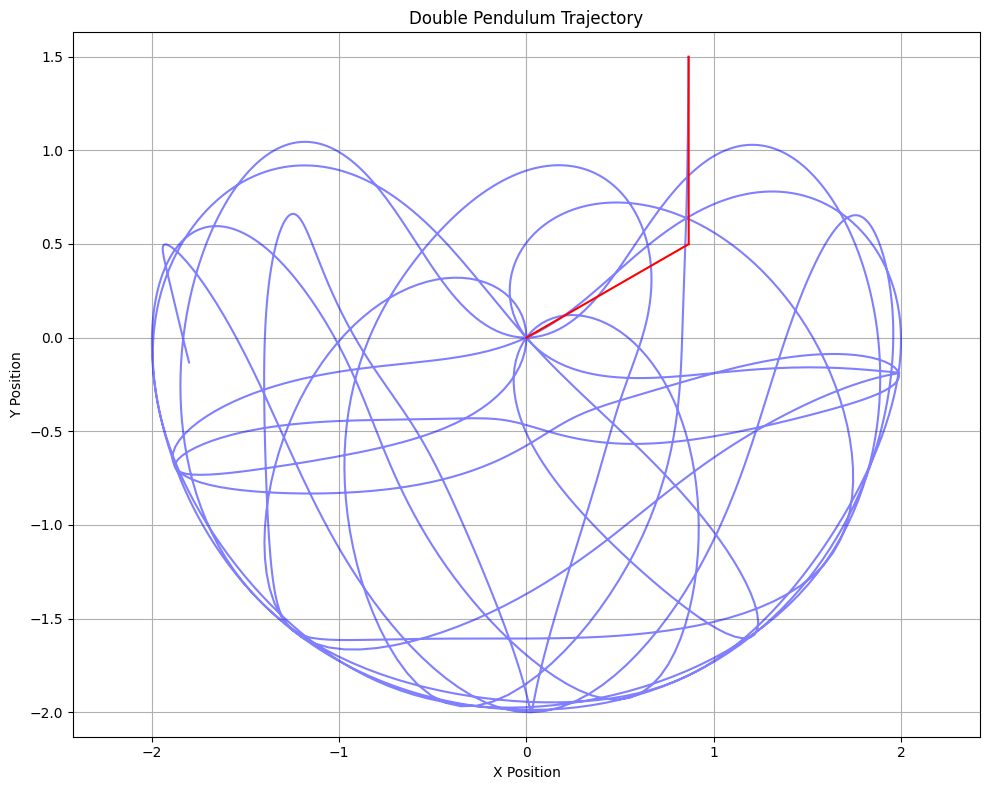

Double pendulum simulation completed


In [7]:
def double_pendulum_simulation(theta1=120, theta2=180, length1=1, length2=1, mass1=1, mass2=1, duration=20):
    """Simulate a chaotic double pendulum system"""
    g = 9.81  # Gravity

    # Convert angles to radians
    theta1 = np.radians(theta1)
    theta2 = np.radians(theta2)

    # Initial angular velocities
    omega1 = 0
    omega2 = 0

    # Time parameters
    dt = 0.01  # Time step
    time_points = np.arange(0, duration, dt)

    # Arrays to store results
    theta1_values = []
    theta2_values = []
    x1_values = []
    y1_values = []
    x2_values = []
    y2_values = []

    # Simulation loop
    for t in time_points:
        # Equations of motion for double pendulum
        num1 = -g*(2*mass1 + mass2)*np.sin(theta1) - mass2*g*np.sin(theta1 - 2*theta2)
        num2 = 2*np.sin(theta1 - theta2)*mass2*(omega2**2*length2 + omega1**2*length1*np.cos(theta1 - theta2))
        den = length1*(2*mass1 + mass2 - mass2*np.cos(2*theta1 - 2*theta2))
        alpha1 = (num1 - num2) / den

        num1 = 2*np.sin(theta1 - theta2)
        num2 = omega1**2*length1*(mass1 + mass2) + g*(mass1 + mass2)*np.cos(theta1)
        num3 = omega2**2*length2*mass2*np.cos(theta1 - theta2)
        den = length2*(2*mass1 + mass2 - mass2*np.cos(2*theta1 - 2*theta2))
        alpha2 = (num1*(num2 + num3)) / den

        # Update angular velocities
        omega1 += alpha1 * dt
        omega2 += alpha2 * dt

        # Update angles
        theta1 += omega1 * dt
        theta2 += omega2 * dt

        # Calculate positions
        x1 = length1 * np.sin(theta1)
        y1 = -length1 * np.cos(theta1)
        x2 = x1 + length2 * np.sin(theta2)
        y2 = y1 - length2 * np.cos(theta2)

        # Store values
        theta1_values.append(theta1)
        theta2_values.append(theta2)
        x1_values.append(x1)
        y1_values.append(y1)
        x2_values.append(x2)
        y2_values.append(y2)

    # Plotting
    plt.figure(figsize=(10, 8))
    plt.plot(x2_values, y2_values, 'b-', alpha=0.5)
    plt.plot([0, x1_values[0]], [0, y1_values[0]], 'r-')
    plt.plot([x1_values[0], x2_values[0]], [y1_values[0], y2_values[0]], 'r-')
    plt.title('Double Pendulum Trajectory')
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.grid(True)
    plt.axis('equal')
    plt.tight_layout()
    plt.savefig('double_pendulum.png', dpi=150)
    plt.show()

    print("Double pendulum simulation completed")
    return x1_values, y1_values, x2_values, y2_values

# Run simulation with initial angles 120° and 180°
x1, y1, x2, y2 = double_pendulum_simulation(theta1=120, theta2=180)